<a href="https://colab.research.google.com/github/bray2020/AI-works/blob/main/VGG16%2C_Image_Augmentation_waffle_pancakes_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [2]:
# Need to re-size all the images to this -> 224x224 with 3 channels
IMAGE_SIZE = [224, 224]
#we have to convert our image into the format that is of image input using function pre-processor input.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [10]:
# useful for getting number of classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/Tensorflow/waffle_pancakes/train/*')

In [18]:
len(folders)   #As there are 2 classes - waffles and pancakes

2

In [11]:
# our layers - we can add more if we want
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model1 = Model(inputs=vgg.input, outputs=prediction)

# display the model
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

- So we can see that the output layer is having 2 neurons for 2 different classes

In [12]:
# compile the model
model1.compile(
  loss='categorical_crossentropy',   
  optimizer='adam',
  metrics=['accuracy']
)

### Apply Image augmentation:
- Image augmentation is a technique of applying different transformations to original images which results in multiple transformed copies of the same image
- Each copy, however, is different from the other in certain aspects depending on the augmentation techniques you apply like vertical/horizontal shifting, rotating, flipping etc
- Applying these small amounts of variations on the original image does not change its target class but only provides a new perspective of capturing the object in real life. And so, we use it is quite often for building deep learning models
- These image augmentation techniques not only expand the size of your dataset but also incorporate a level of variation in the dataset which allows your model to generalize better on unseen data. Also, the model becomes more robust when it is trained on new, slightly altered images
- So by applying augmentation technique we can create a large corpus of similar images without having to worry about collecting new images



### Why to use ImageDataGenerator:
- It provides a quick and easy way to augment your images. It provides a host of different augmentation techniques like standardization, rotation, shifts, flips, brightness change etc
- The main benefit of ImageDataGenerator is that it is designed to provide real-time data augmentation. Meaning it is generating augmented images on the fly while your model is still in the training stage
- It ensures that the model receives new variations of the images at each epoch. But it only returns the transformed images and does not add it to the original corpus of images. If it was, in that case, then the model would be seeing the original images multiple times which would definitely overfit our model
- Another advantage of ImageDataGenerator is that it requires lower memory usage. This is so because without using this class, we load all the images at once. But on using it, we are loading the images in small batches which saves a lot of memory

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,        #used shear transformation
                                   zoom_range = 0.2,         #used zoom transformation
                                   horizontal_flip = True)   #used horizontal flip transformation

test_datagen = ImageDataGenerator(rescale = 1./255)

#prepare the train set
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Tensorflow/waffle_pancakes/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
#prepare the test set
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Tensorflow/waffle_pancakes/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 741 images belonging to 2 classes.
Found 389 images belonging to 2 classes.


In [14]:
# fit the model
hist = model1.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
24/24 [==============================] - 602s 25s/step - loss: 1.3754 - accuracy: 0.6573 - val_loss: 0.3296 - val_accuracy: 0.8586
Epoch 2/5
24/24 [==============================] - 561s 24s/step - loss: 0.2472 - accuracy: 0.9236 - val_loss: 0.2712 - val_accuracy: 0.8920
Epoch 3/5
24/24 [==============================] - 565s 24s/step - loss: 0.1338 - accuracy: 0.9380 - val_loss: 0.2368 - val_accuracy: 0.8920
Epoch 4/5
24/24 [==============================] - 565s 24s/step - loss: 0.1117 - accuracy: 0.9642 - val_loss: 0.2411 - val_accuracy: 0.8895
Epoch 5/5
24/24 [==============================] - 566s 24s/step - loss: 0.0722 - accuracy: 0.9798 - val_loss: 0.2227 - val_accuracy: 0.9075


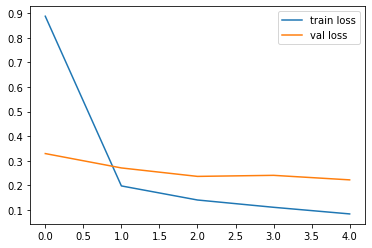

<Figure size 432x288 with 0 Axes>

In [15]:
# loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

- After 2nd epoch the model is showing overfitting issue

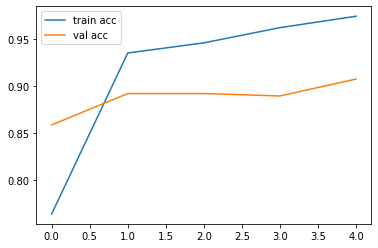

<Figure size 432x288 with 0 Axes>

In [17]:
# accuracies
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### Make predictions:

In [26]:
# get sample image to test.
img_waffle = image.load_img('/content/drive/MyDrive/Colab Notebooks/Tensorflow/waffle_pancakes/test/waffles/images_q=tbn_ANd9GcQMaP81CVen0O6_jXL6hond3aGqyV15LYXUF7okHeDV2TysbS1LvQ.png', target_size = (224, 224))
img_pancake = image.load_img('/content/drive/MyDrive/Colab Notebooks/Tensorflow/waffle_pancakes/test/pancakes/images_q=tbn_ANd9GcQ1Jtg2V7Me2uybx1rqxDMV58Ow17JamorQ3GCrW5TUyT1tcr8EMg.png', target_size = (224, 224))

In [27]:
def model_predict(img, actual):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x_processed = preprocess_input(x)
    result = model.predict(x_processed)
    if(result[0][0]<.50):
        result="Waffle"
    else:
        result="Pancake"
        
    plt.figure()
    plt.imshow(img)
    plt.title('Actual : {} --> Predicted  : {}'.format(actual, result))

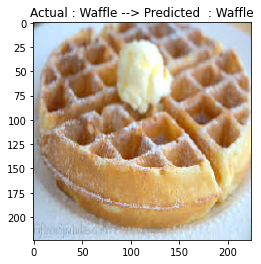

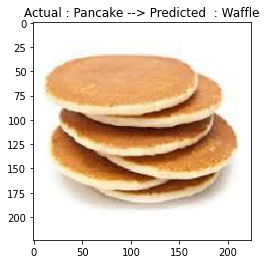

In [28]:
pred_waffle = model_predict(img_waffle, "Waffle")
pred_pancake = model_predict(img_pancake, "Pancake")

- So the model has predicted the waffle correctly but it failed to classify the pancake correctly